<a href="https://colab.research.google.com/github/marquesgabi/Doutorado/blob/master/ANN_%20better_resolution/PSD_histogram_CNN_B_r_squared_jun_23_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import r2_score
from google.colab import files

In [2]:
!pip install mahotas

     |████████████████████████████████| 5.7 MB 4.4 MB/s 


In [3]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020


In [5]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 361, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 361 (delta 38), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (361/361), 165.33 MiB | 27.77 MiB/s, done.
Resolving deltas: 100% (161/161), done.
/content/marquesgabi_fev_2020/Doutorado


In [6]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[4] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [7]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 163 (delta 65), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 21.71 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines


In [8]:
from segment_filter_not_conclude import Segmenta  # got image provided segmented

In [9]:
df=Segmenta(img)
Img_Size = 28

In [10]:
print(df)

    Width           0           1  ...         781         782         783
0     161  110.714561   51.852551  ...   20.482044    7.345936    0.306238
1     164  136.295654  138.676971  ...    0.826294    0.224271    1.370613
2     148  112.550041  131.703430  ...    1.668371    1.700511    1.501096
3     137  112.978363   90.153061  ...    0.384837    0.472428    1.450530
4     102  108.257980  114.384087  ...   79.114189   78.451370   78.540573
5     174  126.749382  123.952431  ...  237.446716  222.672226  208.078766
6     179  129.599762  111.378365  ...    1.192222    0.155832    1.346931
7     154  202.429764  203.900833  ...  135.214890  150.446289  161.785141
8     170  235.882523  180.998627  ...    0.944498    0.183945    1.356540
9     103  170.148346  169.199356  ...  141.111694  145.387115  158.838333
10    198  127.963356  136.271698  ...    1.322824    0.238751    1.315580
11    159   30.389301   51.157543  ...  181.252625  190.131958  203.708160
12    132  203.631775  22

In [11]:
'''
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines
# filename = 'model_ANN.pkl'
filename = 'model_ANN_new.pkl'
model = joblib.load(filename)
'''

"\n!git clone https://github.com/ucfilho/MarquesGabi_Routines\n%cd MarquesGabi_Routines\n# filename = 'model_ANN.pkl'\nfilename = 'model_ANN_new.pkl'\nmodel = joblib.load(filename)\n"

In [12]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 163 (delta 65), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 22.55 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [13]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

In [14]:
X =np.array(df.copy())/255.0 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [15]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

def yback(Y_test):
  nrow, ncol = Y_test.shape
  y_class = np.zeros(nrow,dtype=int)
  y_resp = Y_test
  for k in range(nrow):
    for kk in range(K):
      if(y_resp[k,kk] == 1):
        y_class[k] = kk
  Y_test = y_class.copy()
  return Y_test

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

Description = '3 layers of Convolution: 32, 64, 128 '
N1 = 200
N2 = 10

# make the CNN
model = Sequential()
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 1), filters=32, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=N1))
model.add(Dropout(0.2))
model.add(Dense(units=N2))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [16]:

# training the model
r = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), 
              epochs=200, batch_size=32)

Epoch 1/200
11/11 [==============================] - 22s 142ms/step - loss: 0.7939 - accuracy: 0.6252 - val_loss: 0.6931 - val_accuracy: 0.5102
Epoch 2/200
11/11 [==============================] - 1s 54ms/step - loss: 0.4327 - accuracy: 0.7717 - val_loss: 0.6930 - val_accuracy: 0.5102
Epoch 3/200
11/11 [==============================] - 1s 53ms/step - loss: 0.3400 - accuracy: 0.8185 - val_loss: 0.6930 - val_accuracy: 0.5102
Epoch 4/200
11/11 [==============================] - 1s 55ms/step - loss: 0.1567 - accuracy: 0.9683 - val_loss: 0.6930 - val_accuracy: 0.5102
Epoch 5/200
11/11 [==============================] - 1s 53ms/step - loss: 0.1170 - accuracy: 0.9715 - val_loss: 0.6934 - val_accuracy: 0.5102
Epoch 6/200
11/11 [==============================] - 1s 56ms/step - loss: 0.0832 - accuracy: 0.9611 - val_loss: 0.6948 - val_accuracy: 0.5102
Epoch 7/200
11/11 [==============================] - 1s 53ms/step - loss: 0.0929 - accuracy: 0.9510 - val_loss: 0.6960 - val_accuracy: 0.5102
Epoc

In [17]:
Y_test = yback(Y_test)

In [18]:
pred_test= model.predict_classes(X_test)

data = {'y_true': Y_test,'y_predict': pred_test}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']

  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Predict   0   1
Actual         
0        61  11
1         1  74


In [19]:
pred_test

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [20]:
cont = 0; num =25
img_graos = []
Width_new = []
img=ww[4] 
while( cont < num):
  df=Segmenta(img)
  df_ann =df.copy()
  Width = df['Width']
  del df_ann['Width']
  result = np.array(df_ann)
  result = result.reshape(-1, Img_Size, Img_Size, 1) / 255.0
  prediction = model.predict_classes(result)
  loc_grao =[];k=0
  for i in prediction:
    if( i == 0):
      img_graos.append(df.iloc[k,:])
      Width_new.append(Width.iloc[k])
      cont = cont + 1
    k = k +1
img_graos = pd.DataFrame(img_graos)
print(img_graos)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


    Width           0           1  ...         781         782         783
0   147.0  221.587311  202.390015  ...    0.963719    1.000000    1.154195
3   159.0  171.473404  239.484482  ...    0.145327    1.383213    1.021043
6   190.0  100.268700   92.051964  ...  132.283752  129.448959  134.117996
7   158.0   99.483093  100.108948  ...   40.292583   85.311974  114.493835
12  116.0  168.456604  131.580261  ...    1.000000    1.000000    1.000000
13  165.0  114.177002   94.075409  ...  180.909348  198.985245  213.409775
15  138.0  166.765991  167.702789  ...  180.735565  190.348038  197.816620
17  122.0  198.316315  198.984406  ...  133.372742  130.738235  133.769135
27  108.0  132.481476  127.035660  ...  206.399170  210.556915  208.486969
28  100.0  138.408005  134.318420  ...  140.585587  138.001602  138.399994
29  109.0  177.572693  167.623337  ...  142.489426  127.141991  111.611649
30  133.0  189.229919  190.620514  ...  154.667587  147.905807  144.548477
34  115.0  233.839844  19

In [21]:
Width=np.array(Width_new)

In [22]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_New import PSDArea
from histogram_fev_2021 import PSD
from GetBetterSegm import GetBetter

Cloning into 'marquesgabi_paper_fev_2021'...
remote: Enumerating objects: 655, done.
remote: Counting objects: 100% (416/416), done.
remote: Compressing objects: 100% (414/414), done.
remote: Total 655 (delta 260), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (655/655), 5.44 MiB | 10.54 MiB/s, done.
Resolving deltas: 100% (397/397), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [23]:
!git clone https://github.com/ucfilho/marquesgabi_out_2020
%cd marquesgabi_out_2020
PSD_imageJ = 'Areas_ImageJ.csv'
PSD_new = pd.read_csv(PSD_imageJ)
print(PSD_new.head(3))

Cloning into 'marquesgabi_out_2020'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 146 (delta 75), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (146/146), 1.00 MiB | 7.08 MiB/s, done.
Resolving deltas: 100% (75/75), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020
   Juntas   Area
0       1  2.001
1       2  0.820
2       3  1.270


In [24]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [25]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,147.0,221.587311,202.390015,144.802719,103.083900,114.791389,137.580505,148.963730,138.746033,173.387756,198.770981,192.882111,174.578262,146.444443,110.222229,150.705215,247.312927,248.739243,250.517029,253.573730,254.154205,253.630371,254.210876,254.394577,254.462585,254.129257,253.761887,253.360550,252.018143,230.376450,165.156464,100.993202,108.907043,108.210884,119.961449,130.750580,142.374146,162.575974,176.485275,176.750580,...,1.000000,0.936508,0.954648,1.000000,1.417234,0.179138,1.083900,1.365079,1.004535,0.079365,0.963719,1.598639,1.317460,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.979592,0.081633,0.081633,0.979592,1.000000,1.000000,1.000000,1.000000,1.417234,0.179138,1.083900,1.092971,1.000000,0.963719,1.000000,1.154195
3,159.0,171.473404,239.484482,202.451447,180.314651,191.642456,199.651062,199.607452,199.671204,187.115372,160.734924,137.927643,138.962326,136.229736,144.593948,139.053192,144.166290,153.869263,139.815399,175.771530,237.543060,231.119141,235.953445,241.911819,242.637894,246.830536,247.788818,236.648132,230.472946,128.422333,166.145035,241.620560,220.501129,215.138351,208.737579,209.016815,199.643906,146.795364,142.146988,151.483353,...,1.000000,0.361971,0.000000,0.743009,0.997231,0.815276,0.890669,1.008860,1.234445,0.145327,1.383213,1.258059,5.846406,1.463827,2.008346,0.717258,1.030735,1.782129,0.951663,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.350896,0.000000,0.898066,1.000000,1.000000,1.000000,1.008860,1.234445,0.145327,1.383213,1.021043
6,190.0,100.268700,92.051964,67.384483,47.182381,55.210743,76.605095,91.000763,96.252411,96.777061,92.494957,85.344040,87.350243,85.625153,107.780487,102.243973,87.412071,73.040337,78.188919,81.907257,77.628471,64.611183,58.859386,80.821159,95.967300,102.403091,98.745033,115.027573,98.106812,100.138382,96.405205,75.140060,55.151581,58.728081,79.965530,98.557114,100.809074,96.360222,95.267029,84.482880,...,141.286972,134.173615,138.929626,146.766312,154.182922,156.266708,152.550690,147.557877,139.481781,129.641769,126.677330,134.941711,155.616058,134.597107,126.169189,120.393456,120.850182,118.856827,127.872131,130.052948,141.950241,157.195450,174.547928,140.277100,132.070343,135.619598,141.224472,142.635010,141.835907,130.016510,144.991226,157.428467,164.159225,161.467346,158.564880,156.357651,142.684860,132.283752,129.448959,134.117996
7,158.0,99.483093,100.108948,182.102707,225.514969,242.705658,251.720245,239.680344,185.759171,176.704849,183.956573,182.020187,180.298996,171.202057,152.456345,170.516586,222.757553,230.638672,231.374466,235.176254,234.322861,201.033005,146.912521,195.041641,195.457947,189.602783,177.713028,164.639465,146.302994,125.463860,103.770866,114.719917,172.444000,228.075958,218.657593,177.670410,171.451843,176.215820,177.779358,177.971802,...,88.678741,96.081390,96.490135,99.029800,88.979172,58.351387,48.346096,79.905457,112.794106,120.892159,124.599266,121.897141,120.248840,116.593330,110.590118,111.189713,102.318390,82.656784,62.496552,66.168404,65.745552,68.462425,72.746826,73.742188,73.351219,76.283127,83.506012,86.462914,89.749725,95.376366,98.364845,98.881104,97.983810,73.457619,48.431976,44.976448,39.461945,40.292583,85.311974,114.493835
12,116.0,168.456604,131.580261,70.086800,76.795471,79.537453,78.638527,80.363846,80.868011,76.759811,75.350769,70.164085,61.390011,54.004757,46.175980,44.267536,50.843040,55.721756,53.354336,50.210461,49.166470,47.651604,46.643276,47.883469,46.719376,44.321045,59.608803,85.137924,94.214020,153.841843,117.881088,71.121284,76.161713,75.852554,76.108208,72.833527,69.212837,67.718185,59.601665,46.156960,...,0.689655,1.130

In [26]:
Area = np.array(PSD_new['Area'])
diam_teste = []
for A in Area:
  diam_teste.append((4*A/np.pi)**0.5) 

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]

In [27]:
X.shape

(490, 784)

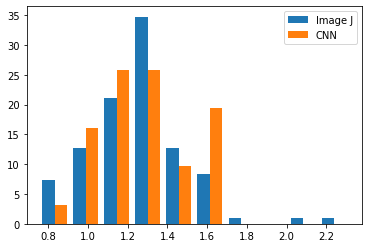

In [28]:
 wt1 = np.ones(len(Diam1)) / len(Diam1)*100
 wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
 X = pd.DataFrame([Diam1,Diameter_All])
 wts = pd.DataFrame([wt1,wt2])
plt.hist(X,weights=wts)
plt.legend(['Image J','CNN'])

(array([[0.07368421, 0.2       , 0.41052632, 0.75789474, 0.88421053,
         0.96842105, 0.97894737, 0.97894737, 0.98947368, 1.        ],
        [0.03225806, 0.19354839, 0.4516129 , 0.70967742, 0.80645161,
         1.        , 1.        , 1.        , 1.        , 1.        ]]),
 array([0.75356807, 0.90995518, 1.06634229, 1.22272941, 1.37911652,
        1.53550363, 1.69189074, 1.84827785, 2.00466497, 2.16105208,
        2.31743919]),
 <a list of 2 Lists of Patches objects>)

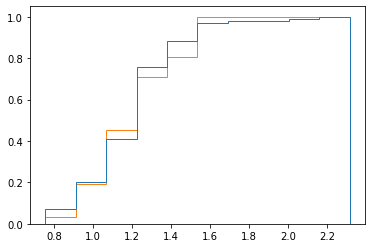

In [29]:
# plt.hist(x, bins=bins, density=True, histtype='step', cumulative=-1,label='Reversed emp.')
plt.hist(X, density=True, histtype='step', cumulative=True,label='Reversed emp.')

r_squared = 0.9880826834483198


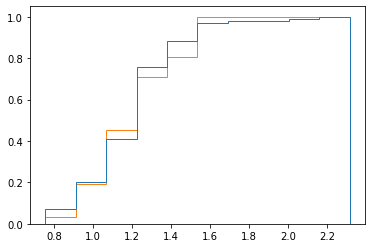

In [30]:
Obj = plt.hist(X, density=True, histtype='step', cumulative=True,label='Reversed emp.')
Y1, Y2 = Obj[0]
Rsquared = r2_score(Y1, Y2)
print('r_squared =',Rsquared)

In [31]:
acc_train = r.history['accuracy'][-1]
acc_test = r.history['val_accuracy'][-1]
loss_train = r.history['loss'][-1]
loss_test = r.history['val_loss'][-1]

In [32]:
df = pd.DataFrame({'N1':N1, 'N2':N2,'R^2':Rsquared,
                   'acc train':acc_train,'acc test':acc_test,
                   'loss train':loss_train,'loss test':loss_test,
                   'Details':Description},
                  index= [0])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
df

,N1,N2,R^2,acc train,acc test,loss train,loss test,Details
0,200,10,0.988083,1.0,0.918367,0.000032,0.278604,"3 layers of Convolution: 32, 64, 128"


<a list of 2 Lists of Patches objects>
[0.75356807 0.90995518 1.06634229 1.22272941 1.37911652 1.53550363
 1.69189074 1.84827785 2.00466497 2.16105208 2.31743919]
[[ 7.36842105 12.63157895 21.05263158 34.73684211 12.63157895  8.42105263
   1.05263158  0.          1.05263158  1.05263158]
 [ 3.22580645 16.12903226 25.80645161 25.80645161  9.67741935 19.35483871
   0.          0.          0.          0.        ]]


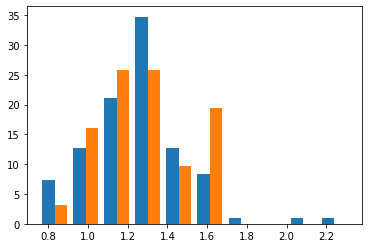

In [34]:
counts, bins, bars = plt.hist(X,weights=wts)
print(bars)
print(bins)
print(counts)

In [35]:
print(counts.sum())

200.00000000000003


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


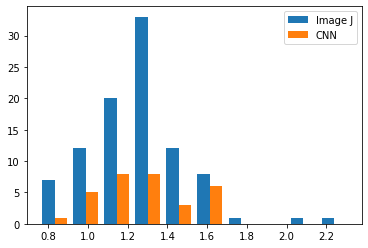

In [36]:

plt.hist([Diam1,Diameter_All])
plt.legend(['Image J','CNN'])


In [37]:
[Diam1,Diameter_All]

[[1.59616801403081,
  1.0217907939900581,
  1.2716187407449044,
  1.104429030701514,
  1.2163487785097904,
  1.6013445735058454,
  1.1715597420637607,
  1.2534662333717612,
  1.2676073151634049,
  1.309600575274104,
  1.292966945531582,
  1.7658322811231006,
  1.3564037533648712,
  1.2407040781688483,
  2.130217298173151,
  1.4228319915327,
  1.0651086490865755,
  1.3008210311003705,
  1.336545951796433,
  0.8927754224911278,
  1.4494292838262302,
  1.4052738287907582,
  1.6421697097891788,
  1.2329833804288621,
  1.19042665178928,
  1.1682948223612457,
  1.1518314137121108,
  0.9607802401865855,
  2.317439190074449,
  1.0591147430338594,
  1.4308630919602832,
  0.7535680705496237,
  0.8608283307581511,
  1.2776122636975893,
  1.3745862957220916,
  1.259546137598783,
  1.2978813187979172,
  1.2412170838050638,
  1.6009469708743893,
  1.3149369953539032,
  1.417901703622935,
  1.2478669653497139,
  1.1055812783082735,
  0.9561307405997607,
  0.9487783503683882,
  1.1238565871041026,
  1

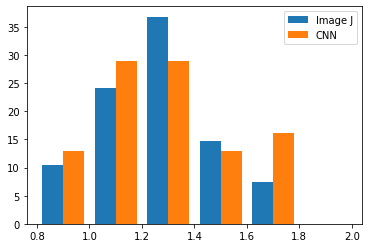

In [52]:
 bins_list = [0.8, 1.0, 1.2, 1.4,1.6, 1.8,2.0]
 wt1 = np.ones(len(Diam1)) / len(Diam1)*100
 wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
 X = pd.DataFrame([Diam1,Diameter_All])
 wts = pd.DataFrame([wt1,wt2])
plt.hist(X,weights=wts,bins = bins_list)
plt.legend(['Image J','CNN'])

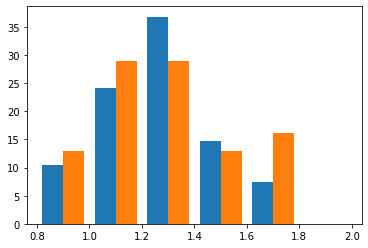

In [53]:
yy = plt.hist(X,weights=wts,bins = bins_list)

In [55]:
yy[0][0]

array([10.52631579, 24.21052632, 36.84210526, 14.73684211,  7.36842105,
        0.        ])

In [51]:
bins_list

[0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2]

In [56]:
k =0
for kk in yy[0][0]:
  name = str(bins_list[k])
  df[name] = yy[0][1][k]
  k = k+1

In [57]:
df

,N1,N2,R^2,acc train,acc test,loss train,loss test,Details,0.8,1.0,1.2,1.4,1.6,1.8,2.0
0,200,10,0.988083,1.0,0.918367,0.000032,0.278604,"3 layers of Convolution: 32, 64, 128",12.903226,29.032258,29.032258,12.903226,16.129032,0.0,0.0


In [58]:
Arq = "output.xlsx"
df.to_excel(Arq)
files.download(Arq)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>